## 감성분석(Sentiment Analysis) - 영화리뷰

In [ ]:
# 라이브러리 가져오기
import tensorflow as tf
import numpy as np

In [ ]:
# Naver Sentiment Movie Corpus v1.0 다운로드하기
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

## 1. 데이터 가져와서 X, y 생성하기 : 방법1

In [ ]:
# 1. 데이터 읽어 저장하기 : encoding 형식으로 utf-8 을 지정해야합니다.
# path_to_train_file / path_to_test_file 을 open() 해서 read()한후 decode(encoding='utf-8') 한 후 train_text / test_text 에 저장합니다.

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8') # ... your code
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8') # ... your code

print('train text length:', len(train_text),' characters')
print('test  text length:', len(test_text),' characters')
# print(train_text[:5])
print(train_text[:300])

train text length: 6937271  characters
test  text length: 2318260  characters
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [ ]:
# X 값을 추출합니다.
# 각 문장을 '\n'으로 분리(split('\n') 사용
# -> 헤더제외 : split('\n')[1:]
# -> '\t'으로 분리
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0 ]
print(len(train_text_X))
train_text_X[:5]

150000


['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [ ]:
# Y 레이블 추출합니다. - X 와 같은 방식으로
# 각 문장을 '\n'으로 분리 -> 헤더제외 -> '\t'으로 분리 -> 마지막 문자 정수로 변환하여 2차원으로 변환
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


### 텍스트 전처리

In [ ]:
# train_text_X  데이터의 입력(X)에 대한 정제(Cleaning)하기
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):
    string = re.sub(r"[^가-힝A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [clean_str(sentence) for sentence in train_text_X] # ... code here
train_text_X[:5]

['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 ! 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [ ]:
# train_text_X 에 대해 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X] # ... code here
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠포스터보고', '초딩영화줄오버연기조차', '가볍지', '않구나'], ['너무재밓었다그래서보는것을추천한다']]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠포스터보고', '초딩영화줄오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다']]

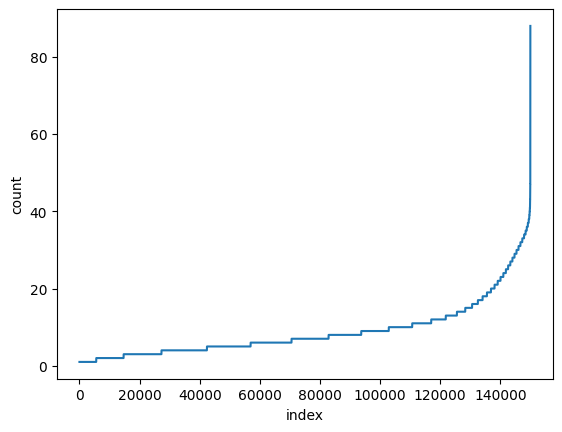

142587


In [ ]:
# 150000개 문장의 단어 길이 확인
import matplotlib.pyplot as plt
# sentences 에 대해 각 문장의 길이를 구해를 구해  sentence_len 저장하기
sentence_len = [len(sentence) for sentence in sentences] # ... code here
# sentence_len 정렬하기
sentence_len.sort()  # ... code here
# sentence_len 으로 plot 하기
plt.plot(sentence_len) # ... code here
plt.xlabel('index')
plt.ylabel('count')
plt.show()

# sentence_len 길이가 25개 이하인 것 합계구하고 출력하기
print(sum([int(l<=25) for l in sentence_len]))
# 15 만개 문장 중 단어 갯수가 25개 이하인 문장의 수가 142590개이다, 25를 sequence_length로 사용

In [ ]:
# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정하기

sentences_new = []
for sentence in sentences:
    # 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용하기
    sentences_new.append([word[:5] for word in sentence[:25]])  # ... code here

sentences = sentences_new
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나'],
 ['너무재밓었'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨',
  '늙어보이기',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

### Tokenizer와 pad_sequences를 사용한 문장 전처리

In [ ]:
#  Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_length = 25
# 가장 빈도가 높은 20000개(max_words)의 단어들만 사용하여 토큰화 인스턴스 생성하기 : tokenizer
tokenizer = Tokenizer(num_words=max_words) # 빈도수가 높은 20000개 단어만 사용하여 숫자로 반환하고 나머지는 공백으로 반환
# 단어(sentences) 인덱스 구축
tokenizer.fit_on_texts(sentences)
# 문자열을 정수 인덱스의 리스트로 변환
sequences = tokenizer.texts_to_sequences(sentences)
# 시퀀스 패딩 : 벡터 표현을 얻음, padding = 'post' - 문장의 뒤부분으로 0을 패딩
train_X = pad_sequences(sequences, padding = 'post')

train_X[:5]

array([[   25,   884,     8,  5795,  1111,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  588,  5796,  6697,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [   71,   346,    31,    35, 10468,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  106,  5338,     4,     2,  2169,   869,   573,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]],

### 학습 모델 구현

In [ ]:
# 토이프로젝트용 코드
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 300, input_length=max_length),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 300)           6000000   
                                                                 
 lstm_1 (LSTM)               (None, 50)                70200     
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 6070455 (23.16 MB)
Trainable params: 6070455 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model = tf.keras.Sequential([
#     # Embedding 층 : max_words, 임베딩된 단어 벡터의 차원 : 300,  입력 데이터의 크기 : max_len : 25
#     tf.keras.layers.Embedding(max_words, 300, input_length=max_length), # V:20000, D:300, T:25  --> (?,25,300)
#      # LSTM 층 : units = 50
#     tf.keras.layers.LSTM(units=50),                       # (?,50)
#     # 출력 : class_num, activation = 'softmax'
#     tf.keras.layers.Dense(2, activation='softmax')
# ])

# # sparse_categorical_crossentropy : 정답 Y가 희소인 다중 분류 모델의 loss
# # categorical_crossentropy: 다중 분류 모델의 loss

# # loss 종류
# # mean_squared_error : 평균제곱 오차
# # binary_crossentropy : 이진분류 오차
# # categorical_crossentropy : 다중 분류 오차. one-hot encoding 클래스, [0.2, 0.3, 0.5] 와 같은 출력값과 실측값의 오차값을 계산한다.
# # sparse_categorical_crossentropy: 다중 분류 오차. 위와 동일하지만 , integer type 클래스라는 것이 다르다.

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
#토이프젝용 코드
from tensorflow.keras.utils import to_categorical

# train_Y를 원-핫 인코딩
train_Y_onehot = to_categorical(train_Y, num_classes=5)
test_Y_onehot = to_categorical(train_Y, num_classes=5)

# 모델 훈련
history = model.fit(train_X, train_Y_onehot, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0807 - accuracy: 0.9535 - val_loss: 1.1622 - val_accuracy: 0.7925
Epoch 2/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0784 - accuracy: 0.9536 - val_loss: 1.1787 - val_accuracy: 0.7945
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0780 - accuracy: 0.9541 - val_loss: 1.1956 - val_accuracy: 0.7861
Epoch 4/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0768 - accuracy: 0.9547 - val_loss: 1.2378 - val_accuracy: 0.7929
Epoch 5/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0760 - accuracy: 0.9548 - val_loss: 1.2094 - val_accuracy: 0.7899
Epoch 6/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0753 - accuracy: 0.9548 - val_loss: 1.1673 - val_accuracy: 0.7922
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0744 - accuracy: 0.9553 - val_loss: 1.2177 - val_accuracy: 0.7910
Epoch 

In [ ]:
# 감성 분석 모델 학습 : 약 15분 소요
# history = model.fit(train_X,train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 74s 75ms/step - loss: 0.4338 - accuracy: 0.7845 - val_loss: 0.3858 - val_accuracy: 0.8190
Epoch 2/5
938/938 [==============================] - 70s 74ms/step - loss: 0.3252 - accuracy: 0.8475 - val_loss: 0.3918 - val_accuracy: 0.8205
Epoch 3/5
938/938 [==============================] - 63s 67ms/step - loss: 0.2744 - accuracy: 0.8683 - val_loss: 0.4203 - val_accuracy: 0.8169
Epoch 4/5
938/938 [==============================] - 66s 71ms/step - loss: 0.2292 - accuracy: 0.8891 - val_loss: 0.4879 - val_accuracy: 0.8101
Epoch 5/5
 36/938 [>.............................] - ETA: 55s - loss: 0.1775 - accuracy: 0.9169

KeyboardInterrupt: 

In [ ]:
history.history['loss']
history.history['val_loss']
history.history['accuracy']
history.history['val_accuracy']

[0.817633330821991,
 0.8230999708175659,
 0.8185666799545288,
 0.8133333325386047,
 0.8051999807357788,
 0.8044999837875366,
 0.8021000027656555,
 0.7997000217437744,
 0.7993333339691162,
 0.8031333088874817,
 0.7955666780471802,
 0.7983333468437195,
 0.7979000210762024,
 0.7958999872207642,
 0.7918333411216736,
 0.794700026512146,
 0.7929333448410034,
 0.789900004863739,
 0.7917666435241699,
 0.7924000024795532]

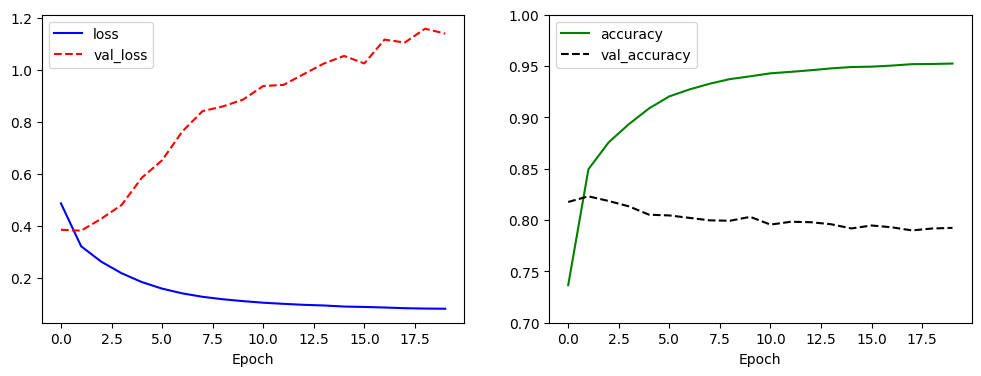

In [ ]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

### 정확도 측정하기

In [ ]:
# test_X 값 추출하기
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]

# test_text_X  데이터의 입력(X)에 대한 정제(Cleaning)하기
test_text_X =[clean_str(sentence) for sentence in test_text_X ] # ... code here

# 문장을 띄어쓰기 단위로 단어 분리하여 test_sentences 저장하기 : split()
test_sentences = [sentence.split(' ') for sentence in test_text_X] # ... code here

# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
test_sentences_new = []
for sentence in test_sentences:
    test_sentences_new.append([word[:5] for word in sentence[:25]])
test_sentences = test_sentences_new

# 테스트 데이터 셋 토근화하기 : texts_to_sequences()
test_sentences = tokenizer.texts_to_sequences(test_sentences)
# 테스트 데이터 셋 패딩하기 : pad_sequences()  - 문장의 뒤부분으로 0을 패딩
test_X = pad_sequences(test_sentences, padding='post')

test_X[:5]  # 25개의 길이로 패딩이 완성됨

array([[  594,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  357,     9,  4626,   990,    69,  3348,  2773,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 2110,    32, 12562,   506,  1450,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17857,   109, 12074,   244, 18890,    11,  3365,   348,   468,
        12715,     5,     5,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]],

In [ ]:
accr = model.evaluate(test_X, test_Y, verbose=0)

ValueError: ignored

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

NameError: ignored

### 예측

In [ ]:
# 임의의 문장 감성 분석 예측 결과 확인해보기
test_sent = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sent = test_sent.split(' ') # ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
test_sents = []
new_sent = []

for word in test_sent:
    new_sent.append(word)
    test_sents.append(new_sent[:])
# test_sentences  # 9개

test_sequences = tokenizer.texts_to_sequences(test_sents)
test_X_new = pad_sequences(test_sequences, padding='post', maxlen=25)
# test_X_new

prediction = model.predict(test_X_new)  # 분류할 값 2개가 확률로 출력

for idx, sentence in enumerate(test_sents):
    print(sentence)
    print(prediction[idx])

1/1 [==============================] - 0s 22ms/step
['재미있을']
[4.6213082e-04 9.9953783e-01 3.3322081e-08 3.7608931e-08 2.7367003e-08]
['재미있을', '줄']
[4.9437005e-02 9.5056289e-01 3.7527062e-08 3.3293016e-08 2.8739647e-08]
['재미있을', '줄', '알았는데']
[9.9978095e-01 2.1903840e-04 9.7700603e-10 1.1020345e-09 5.2736987e-10]
['재미있을', '줄', '알았는데', '완전']
[9.9997079e-01 2.9227578e-05 1.6547924e-10 1.5688251e-10 8.8706015e-11]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[9.9997079e-01 2.9227578e-05 1.6547924e-10 1.5688251e-10 8.8706015e-11]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[9.9989104e-01 1.0893845e-04 2.6721411e-10 2.4807528e-10 1.3283072e-10]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[9.9997807e-01 2.1951106e-05 5.0627280e-11 5.8017566e-11 3.2274336e-11]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.9999833e-01 1.6222642e-06 1.1466811e-11 1.5020549e-11 7.1676211e-12]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.9999833e-01 1.6222642e-06 1.1466811e-11 1.502

In [ ]:
def sentiment_predict(test_sentence):
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    new_sentence = []

    for word in test_sentence:
        new_sentence.append(word)
        test_sentences.append(new_sentence[:])

    sequences = tokenizer.texts_to_sequences(test_sentences)
    test_X_new = pad_sequences(sequences, padding='post', maxlen=25)

    prediction = model.predict(test_X_new)

    # Initialize variables to store cumulative probabilities
    total_prob_polar_negative = 0
    total_prob_negative = 0
    total_prob_neutral = 0
    total_prob_positive = 0
    total_prob_polar_positive = 0

    for idx, sentence in enumerate(test_sentences):
        score = prediction[idx]

        total_prob_polar_negative += score[0]
        total_prob_negative += score[1]
        total_prob_neutral += score[2]
        total_prob_positive += score[3]
        total_prob_polar_positive += score[4]

    # Calculate total probability
    total_prob = total_prob_polar_negative + total_prob_negative + total_prob_neutral + total_prob_positive + total_prob_polar_positive

    if total_prob == 0:
        print("예측 불가능한 문장입니다.")
    else:
        # Find the maximum probability and corresponding label
        max_prob = max(total_prob_polar_negative, total_prob_negative, total_prob_neutral, total_prob_positive, total_prob_polar_positive)

        if max_prob == total_prob_polar_negative:
            result = "불쾌함을 느낀 리뷰, 평점 : ★☆☆☆☆"
        elif max_prob == total_prob_negative:
            result = "부정적인 리뷰, 평점 :★★☆☆☆"
        elif max_prob == total_prob_neutral:
            result = "보통 리뷰, 평점 : ★★★☆☆"
        elif max_prob == total_prob_positive:
            result = "좋은 리뷰, 평점 : ★★★★☆"
        elif max_prob == total_prob_polar_positive:
            result = "행복함을 느낀 리뷰, 평점 : ★★★★★"

        print("{:.2f}% 확률로 {}".format(max_prob / total_prob * 100, result))

In [ ]:
prediction = model.predict(test_X_new)

1/1 [==============================] - 0s 20ms/step


In [ ]:
# # 감성 분석 함수 구현
# def sentiment_predict(test_sentence):
#     test_sentence = test_sentence.split(' ')
#     test_sentences = []
#     new_sentence = []

#     for word in test_sentence:
#         new_sentence.append(word)
#         test_sentences.append(new_sentence[:])

#     sequences = tokenizer.texts_to_sequences(test_sentences)
#     test_X_new = pad_sequences(sequences,padding='post', maxlen=25)

#     prediction = model.predict(test_X_new)

#     for idx, sentence in enumerate(test_sentences):
#         score = prediction[idx]

#     if(score[0] > score[1]):
#         print("{:.2f}% 확률로 부정 리뷰입니다.".format(score[0] * 100))
#     else:
#         print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score[0]) * 100))

In [ ]:
sentiment_predict('이 영화 핵평범 ~')

1/1 [==============================] - 0s 18ms/step
57.13% 확률로 부정적인 리뷰, 평점 :★★☆☆☆


In [ ]:
sentiment_predict('핵 재미없어 내내 졸았어요')

1/1 [==============================] - 0s 19ms/step
75.01% 확률로 불쾌함을 느낀 리뷰


In [ ]:
sentiment_predict('돈이 아까워요 ')

1/1 [==============================] - 0s 21ms/step
100.00% 확률로 불쾌함을 느낀 리뷰


In [ ]:
sentiment_predict('이 영화 하품만 나와요~')

1/1 [==============================] - 0s 21ms/step
71.50% 확률로 불쾌함을 느낀 리뷰


In [ ]:
sentiment_predict('두 번 봐도 재미있어요')

1/1 [==============================] - 0s 35ms/step
99.35% 확률로 부정적인 리뷰


In [ ]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

1/1 [==============================] - 0s 18ms/step
80.50% 확률로 불쾌함을 느낀 리뷰입니다.
19.50% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
sentiment_predict('이 영화 왜 만든거야')

1/1 [==============================] - 0s 20ms/step
72.26% 확률로 불쾌함을 느낀 리뷰입니다.
27.74% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
sentiment_predict('이 영화 꼭 보세요')

1/1 [==============================] - 0s 18ms/step
69.99% 확률로 부정적인 리뷰


In [ ]:
sentiment_predict('안녕하세요')

1/1 [==============================] - 0s 20ms/step
99.99% 확률로 부정적인 리뷰


In [ ]:
sentiment_predict('그저 그래요')

1/1 [==============================] - 0s 39ms/step
66.24% 확률로 불쾌함을 느낀 리뷰입니다.
33.76% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
sentiment_predict('좋아하는 사람들이 있을지는 모르겠지만 나는 그저그랬다')

1/1 [==============================] - 0s 18ms/step
67.66% 확률로 불쾌함을 느낀 리뷰입니다.
32.34% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
sentiment_predict('전체적으로 제 겨털로 만들어도 이것보단 잘 만들 것 같네요! 정말 훌륭한감독의 대단한 작품입니다!')

1/1 [==============================] - 0s 35ms/step
92.38% 확률로 불쾌함을 느낀 리뷰입니다.
7.62% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
sentiment_predict('존나 재미없네')

1/1 [==============================] - 0s 32ms/step
94.76% 확률로 불쾌함을 느낀 리뷰입니다.
5.24% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
sentiment_predict('감독은 생각이 있는거냐ㅋㅋㅋ')

1/1 [==============================] - 0s 27ms/step
99.99% 확률로 불쾌함을 느낀 리뷰입니다.
0.01% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
sentiment_predict ('뭐 나쁘진 않음. 그렇다고 좋지도 않음')

1/1 [==============================] - 0s 26ms/step
91.42% 확률로 불쾌함을 느낀 리뷰입니다.
8.58% 확률로 부정적인 리뷰입니다.
0.00% 확률로 보통 리뷰입니다.
0.00% 확률로 좋은 리뷰입니다.
0.00% 확률로 행복함을 느낀 리뷰입니다.


In [ ]:
import pandas as pd

# pandas 의 read_csv() 사용하여 가져오기
df_train_raw = pd.read_csv(path_to_train_file, sep='\t')
df_test_raw  = pd.read_csv(path_to_test_file, sep='\t')
df_train_raw.head(3)

# 입력항목 X 과 레이블 Y 생성하기
df_trainX = df_train_raw.document
df_trainY = df_train_raw.label
train_Y = df_trainY.to_numpy().reshape(-1, 1)

df_testX = df_test_raw.document
df_testY = df_test_raw.label
test_Y = df_testY.to_numpy().reshape(-1, 1)

# 누락된 값 확인
missing_values = df_trainX.isnull().sum()
missing_values

# 문장을 단어 리스트로 변환하는 함수 수정
def tokenize_sentence(sentence):
    if not isinstance(sentence, str):
        return []
    # 특수 문자 제거
    sentence = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', sentence).split()
    # 공백을 기준으로 단어 분리
    words = sentence
    return words


# 각 문장을 단어 리스트로 변환하여 sentences 리스트에 저장
df_trainX_sent = df_trainX.apply(tokenize_sentence).tolist()

print(df_trainX_sent[:3])

'''
[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
'''

[['아', '더빙', '진짜', '짜증나네요', '목소리'], ['흠포스터보고', '초딩영화줄오버연기조차', '가볍지', '않구나'], ['너무재밓었다그래서보는것을추천한다']]


In [ ]:
# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정하기

sentences_new = []
for sentence in df_trainX_sent:
    # 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용하기
    sentences_new.append([word[:5] for word in sentence[:25]])  # ... code here

df_trainX_sent = sentences_new
df_trainX_sent[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠포스터보', '초딩영화줄', '가볍지', '않구나'],
 ['너무재밓었'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다평점', '조정'],
 ['사이몬페그',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화스파이',
  '늙어보이기',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

In [ ]:
# 토큰화 하기 : 방법2
from konlpy.tag import Okt

okt = Okt()

# 문장을 토큰화하는 함수
def tokenize_with_okt(sentence):
    if not isinstance(sentence, str):
        return []
    words = okt.morphs(sentence)
    return words

# 각 문장을 토큰화
df_trainX_sent_with_okt = df_trainX.apply(tokenize_with_okt).tolist()
df_trainX_sent_with_okt[:5]

sentences_new = []
for sentence in df_trainX_sent_with_okt:
    # 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용하기
    sentences_new.append([word[:5] for word in sentence[:25]])  # ... code here

df_trainX_sent_with_okt = sentences_new
df_trainX_sent_with_okt[:5]

[['아', '더빙', '..', '진짜', '짜증나네요', '목소리'],
 ['흠',
  '...',
  '포스터',
  '보고',
  '초딩',
  '영화',
  '줄',
  '....',
  '오버',
  '연기',
  '조차',
  '가볍지',
  '않구나'],
 ['너', '무재', '밓었', '다그', '래서', '보는것을', '추천', '한', '다'],
 ['교도소', '이야기', '구먼', '..', '솔직히', '재미', '는', '없다', '..', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '의',
  '익살스런',
  '연기',
  '가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨',
  '에서',
  '늙어',
  '보이기만',
  '했던',
  '커스틴',
  '던스트',
  '가',
  '너무나도',
  '이뻐',
  '보였다']]

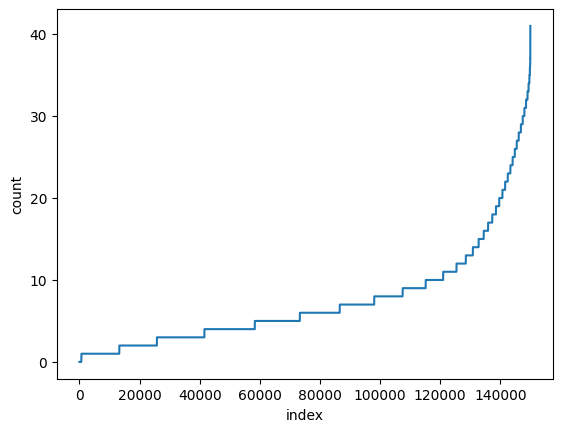

144801


In [ ]:
# 150000개 문장의 단어 길이 확인
import matplotlib.pyplot as plt
# sentences 에 대해 각 문장의 길이를 구해를 구해  sentence_len 저장하기
sentence_len = [len(sentence) for sentence in df_trainX_sent] # ... code here
# sentence_len 정렬하기
sentence_len.sort()  # ... code here
# sentence_len 으로 plot 하기
plt.plot(sentence_len) # ... code here
plt.xlabel('index')
plt.ylabel('count')
plt.show()

# sentence_len 길이가 25개 이하인 것 합계구하고 출력하기
print(sum([int(l<=25) for l in sentence_len]))
# 15 만개 문장 중 단어 갯수가 25개 이하인 문장의 수가 142590개이다, 25를 sequence_length로 사용

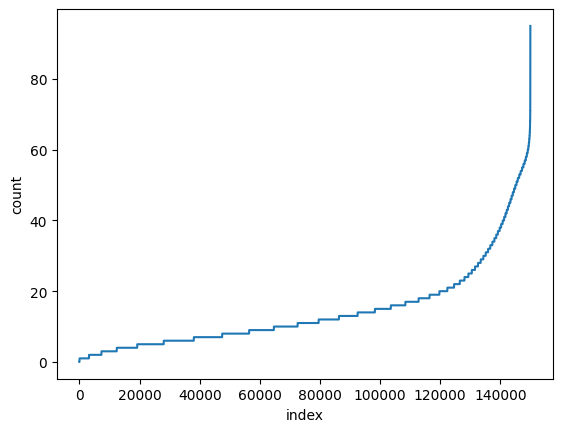

130509


In [ ]:
# sentences 에 대해 각 문장의 길이를 구해를 구해  sentence_len 저장하기
sentence_len = [len(sentence) for sentence in df_trainX_sent_with_okt] # ... code here
# sentence_len 정렬하기
sentence_len.sort()  # ... code here
# sentence_len 으로 plot 하기
plt.plot(sentence_len) # ... code here
plt.xlabel('index')
plt.ylabel('count')
plt.show()

# sentence_len 길이가 25개 이하인 것 합계구하고 출력하기
print(sum([int(l<=25) for l in sentence_len]))
# 15 만개 문장 중 단어 갯수가 25개 이하인 문장의 수가 142590개이다, 25를 sequence_length로 사용

### Tokenizer와 pad_sequences를 사용한 문장 전처리

In [ ]:
#  Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_length = 25
# 가장 빈도가 높은 20000개(max_words)의 단어들만 사용하여 토큰화 인스턴스 생성하기 : tokenizer
tokenizer = Tokenizer(num_words=max_words) # 빈도수가 높은 20000개 단어만 사용하여 숫자로 반환하고 나머지는 공백으로 반환
# 단어(sentences) 인덱스 구축
tokenizer.fit_on_texts(sentences)
# 문자열을 정수 인덱스의 리스트로 변환
df_trainX_sequences = tokenizer.texts_to_sequences(df_trainX_sent)
# 시퀀스 패딩 : 벡터 표현을 얻음, padding = 'post' - 문장의 뒤부분으로 0을 패딩
train_X = pad_sequences(df_trainX_sequences, padding = 'post')

train_X[:5]

array([[   25,   884,     8,  5795,  1111,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 6697,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [   71,   346, 10468,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  106,  5338,   869,   573,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

### 학습 모델 구현

In [ ]:
model_df = tf.keras.Sequential([
    # Embedding 층 : max_words, 임베딩된 단어 벡터의 차원 : 300,  입력 데이터의 크기 : max_len : 25
    tf.keras.layers.Embedding(max_words, 300, input_length=max_length), # V:20000, D:300, T:25  --> (?,25,300)
     # LSTM 층 : units = 50
    tf.keras.layers.LSTM(units=50),                       # (?,50)
    # 출력 : class_num, activation = 'softmax'
    tf.keras.layers.Dense(2, activation='softmax')
])

# sparse_categorical_crossentropy : 정답 Y가 희소인 다중 분류 모델의 loss
# categorical_crossentropy: 다중 분류 모델의 loss

# loss 종류
# mean_squared_error : 평균제곱 오차
# binary_crossentropy : 이진분류 오차
# categorical_crossentropy : 다중 분류 오차. one-hot encoding 클래스, [0.2, 0.3, 0.5] 와 같은 출력값과 실측값의 오차값을 계산한다.
# sparse_categorical_crossentropy: 다중 분류 오차. 위와 동일하지만 , integer type 클래스라는 것이 다르다.

model_df.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_df.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 300)           6000000   
                                                                 
 lstm_2 (LSTM)               (None, 50)                70200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6070302 (23.16 MB)
Trainable params: 6070302 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 감성 분석 모델 학습 : 약 15분 소요

history = model_df.fit(train_X, train_Y , epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 54s 55ms/step - loss: 0.4512 - accuracy: 0.7693 - val_loss: 0.4186 - val_accuracy: 0.8091
Epoch 2/5
938/938 [==============================] - 61s 65ms/step - loss: 0.3415 - accuracy: 0.8344 - val_loss: 0.4047 - val_accuracy: 0.8057
Epoch 3/5
938/938 [==============================] - 62s 66ms/step - loss: 0.2895 - accuracy: 0.8551 - val_loss: 0.4544 - val_accuracy: 0.8023
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.2480 - accuracy: 0.8720 - val_loss: 0.5031 - val_accuracy: 0.8024
Epoch 5/5
938/938 [==============================] - 61s 65ms/step - loss: 0.2143 - accuracy: 0.8885 - val_loss: 0.5806 - val_accuracy: 0.7944


In [ ]:
# test_X 값 추출하기
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]

# test_text_X  데이터의 입력(X)에 대한 정제(Cleaning)하기
test_text_X =[clean_str(sentence) for sentence in test_text_X ] # ... code here

# 문장을 띄어쓰기 단위로 단어 분리하여 test_sentences 저장하기 : split()
test_sentences = [sentence.split(' ') for sentence in test_text_X] # ... code here

# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
test_sentences_new = []
for sentence in test_sentences:
    test_sentences_new.append([word[:5] for word in sentence[:25]])
test_sentences = test_sentences_new

# 테스트 데이터 셋 토근화하기 : texts_to_sequences()
test_sentences = tokenizer.texts_to_sequences(test_sentences)
# 테스트 데이터 셋 패딩하기 : pad_sequences()  - 문장의 뒤부분으로 0을 패딩
test_X = pad_sequences(test_sentences, padding='post')

test_X[:5]  # 25개의 길이로 패딩이 완성됨